In [2]:
#comment
!pip install netCDF4
!pip install cartopy
!pip install fiona
!pip install numpy
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 124.6 MB/s eta 0:00:00


In [4]:
# First process geo_em* data
# Provide the path to your file
file_path_0 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/geo_em.d03_10m.nc'  # Update with the actual path

# Open the NetCDF file
data_0 = nc.Dataset(file_path_0, mode='r')
print(data_0.dimensions.keys()) # dimension names
print(data_0.variables.keys()) # variable names
# Access the variable
lai_0 = data_0.variables['LAI12M'][:]
lai_0[lai_0 == 0] = np.nan
lat_0 = data_0.variables['XLAT_M'][:]
lon_0 = data_0.variables['XLONG_M'][:]
print(lai_0.shape)
print(lat_0.shape)
print(lon_0.shape)

file_path_1 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/geo_em.d03_30s.nc'  # Update with the actual path

# Open the NetCDF file
data_1 = nc.Dataset(file_path_1, mode='r')
print(data_1.dimensions.keys()) # dimension names
print(data_1.variables.keys()) # variable names
# Access the variable
lai_1 = data_1.variables['LAI12M'][:]
lai_1[lai_1 == 0] = np.nan
lat_1 = data_1.variables['XLAT_M'][:]
lon_1 = data_1.variables['XLONG_M'][:]
print(lai_1.shape)
print(lat_1.shape)
print(lon_1.shape)



dict_keys(['Time', 'DateStrLen', 'west_east', 'south_north', 'south_north_stag', 'west_east_stag', 'land_cat', 'soil_cat', 'month', 'crop'])
dict_keys(['Times', 'XLAT_M', 'XLONG_M', 'XLAT_V', 'XLONG_V', 'XLAT_U', 'XLONG_U', 'CLAT', 'CLONG', 'MAPFAC_M', 'MAPFAC_V', 'MAPFAC_U', 'MAPFAC_MX', 'MAPFAC_VX', 'MAPFAC_UX', 'MAPFAC_MY', 'MAPFAC_VY', 'MAPFAC_UY', 'E', 'F', 'SINALPHA', 'COSALPHA', 'LANDMASK', 'XLAT_C', 'XLONG_C', 'SINALPHA_U', 'COSALPHA_U', 'SINALPHA_V', 'COSALPHA_V', 'LANDUSEF', 'LU_INDEX', 'HGT_M', 'SOILTEMP', 'SOILCTOP', 'SCT_DOM', 'SOILCBOT', 'SCB_DOM', 'ALBEDO12M', 'GREENFRAC', 'LAI12M', 'SNOALB', 'CON', 'VAR', 'OA1', 'OA2', 'OA3', 'OA4', 'OL1', 'OL2', 'OL3', 'OL4', 'VAR_SSO', 'CROPTYPE', 'SEASON_GDD', 'PLANTING', 'HARVEST', 'IRFRACT', 'SIFRACT', 'MIFRACT', 'FIFRACT', 'TD_FRACTION', 'FDEPTH', 'RECHCLIM', 'EQZWT', 'RIVERBED'])
(1, 12, 171, 162)
(1, 171, 162)
(1, 171, 162)
dict_keys(['Time', 'DateStrLen', 'west_east', 'south_north', 'south_north_stag', 'west_east_stag', 'land_c

In [5]:
# Now process sensor_indep data
file_path_2 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/matlab/MODIS_sensor_indep/LAI_2020_04.nc'  # Update with the actual path

# Open the NetCDF file
data_2 = nc.Dataset(file_path_2, mode='r')
print(data_2.dimensions.keys()) # dimension names
print(data_2.variables.keys()) # variable names
# Access the variable
lai_2 = data_2.variables['Band1'][:]
lat_2 = data_2.variables['lat'][:]
lon_2 = data_2.variables['lon'][:]

# Now process sensor_indep data
file_path_3 = '/content/drive/MyDrive/Google_Drive_UTmail/SDSU/matlab/MODIS_sensor_indep/LAI_2020_09.nc'  # Update with the actual path

# Open the NetCDF file
data_3 = nc.Dataset(file_path_3, mode='r')
print(data_3.dimensions.keys()) # dimension names
print(data_3.variables.keys()) # variable names
# Access the variable
lai_3 = data_3.variables['Band1'][:]


dict_keys(['lon', 'lat'])
dict_keys(['crs', 'lat', 'lon', 'Band1'])
dict_keys(['lon', 'lat'])
dict_keys(['crs', 'lat', 'lon', 'Band1'])


In [6]:
# Define the latitude and longitude bounds
lat_lower_bound = 32.65
lat_upper_bound = 34.1
lon_lower_bound = -116.7
lon_upper_bound = -115.1

# Find the indices that satisfy the bounds
lat_indices = np.where((lat_2 >= lat_lower_bound) & (lat_2 <= lat_upper_bound))[0]
lon_indices = np.where((lon_2 >= lon_lower_bound) & (lon_2 <= lon_upper_bound))[0]

# Select the subset based on the found indices
lat_2_new = lat_2[lat_indices[0]:lat_indices[-1] + 1]
lon_2_new = lon_2[lon_indices[0]:lon_indices[-1] + 1]
lai_2_new = lai_2[lat_indices[0]:lat_indices[-1] + 1, lon_indices[0]:lon_indices[-1] + 1]



lai_3_new = lai_3[lat_indices[0]:lat_indices[-1] + 1, lon_indices[0]:lon_indices[-1] + 1]

print(lat_2_new.shape)
print(lon_2_new.shape)
print(lai_2_new.shape)
print(lai_3_new.shape)


(323,)
(356,)
(323, 356)
(323, 356)


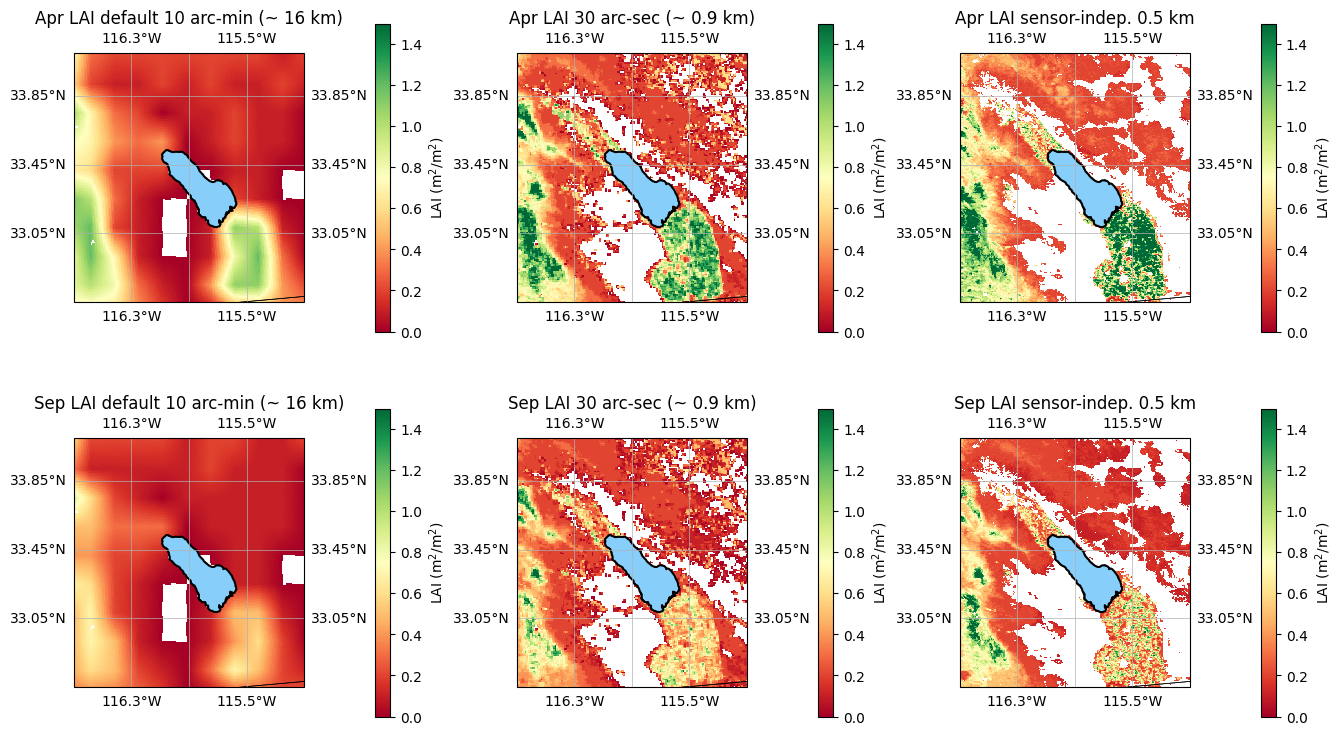

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")

fig, ((ax_1, ax_2, ax_3), (ax_4, ax_5, ax_6)) = plt.subplots(2, 3, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.25, hspace=-0.5)  # Adjust the width space between subplots wspace controls horizontal

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.65, 34.1])
mesh_1 = ax_1.pcolormesh(lon_0[0, :, :], lat_0[0, :, :], lai_0[0, 4, :, :], transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=1.5)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor=(0.529, 0.808, 0.980))
#ax_1.gridlines(draw_labels=True)
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.65, 34.1, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('Apr LAI default 10 arc-min (~ 16 km)')
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, label='LAI (m$^2$/m$^2$)', shrink=0.4, pad=0.2)

# Second subplot
ax_2.set_extent([-116.7, -115.1, 32.65, 34.1])
mesh_2 = ax_2.pcolormesh(lon_1[0, :, :], lat_1[0, :, :], lai_1[0, 4, :, :], transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=1.5)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor=(0.529, 0.808, 0.980))
#ax2.gridlines(draw_labels=True)
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.65, 34.1, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('Apr LAI 30 arc-sec (~ 0.9 km)')
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, label='LAI (m$^2$/m$^2$)', shrink=0.4, pad=0.2)

# Third subplot
ax_3.set_extent([-116.7, -115.1, 32.65, 34.1])
mesh_3 = ax_3.pcolormesh(lon_2_new, lat_2_new, lai_2_new, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=1.5)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor=(0.529, 0.808, 0.980))
#ax_3.gridlines(draw_labels=True)
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.65, 34.1, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('Apr LAI sensor-indep. 0.5 km')
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, label='LAI (m$^2$/m$^2$)', shrink=0.4, pad=0.2)

# Fourth subplot
ax_4.set_extent([-116.7, -115.1, 32.65, 34.1])
mesh_4 = ax_4.pcolormesh(lon_0[0, :, :], lat_0[0, :, :], lai_0[0, 9, :, :], transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=1.5)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor=(0.529, 0.808, 0.980))
#ax_4.gridlines(draw_labels=True)
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.65, 34.1, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('Sep LAI default 10 arc-min (~ 16 km)')
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, label='LAI (m$^2$/m$^2$)', shrink=0.4, pad=0.2)

# Fifth subplot
ax_5.set_extent([-116.7, -115.1, 32.65, 34.1])
mesh_5 = ax_5.pcolormesh(lon_1[0, :, :], lat_1[0, :, :], lai_1[0, 9, :, :], transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=1.5)
counties.plot(ax=ax_5, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_5, linewidth=1.5, color='black', facecolor=(0.529, 0.808, 0.980))
#ax2.gridlines(draw_labels=True)
ax_5.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.65, 34.1, 0.4), linewidth=0.5, draw_labels=True)
ax_5.set_title('Sep LAI 30 arc-sec (~ 0.9 km)')
cbar_5 = plt.colorbar(mesh_5, ax=ax_5, label='LAI (m$^2$/m$^2$)', shrink=0.4, pad=0.2)

# Sixth subplot
ax_6.set_extent([-116.7, -115.1, 32.65, 34.1])
mesh_6 = ax_6.pcolormesh(lon_2_new, lat_2_new, lai_3_new, transform=ccrs.PlateCarree(), cmap='RdYlGn', vmin=0, vmax=1.5)
counties.plot(ax=ax_6, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_6, linewidth=1.5, color='black', facecolor=(0.529, 0.808, 0.980))
#ax_6.gridlines(draw_labels=True)
ax_6.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.65, 34.1, 0.4), linewidth=0.5, draw_labels=True)
ax_6.set_title('Sep LAI sensor-indep. 0.5 km')
cbar_6 = plt.colorbar(mesh_6, ax=ax_6, label='LAI (m$^2$/m$^2$)', shrink=0.4, pad=0.2)


plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/lai_comp_10m_30s_500m.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()
